In [14]:
!pip install pandas sklearn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import preprocessing

     |████████████████████████████████| 11.2 MB 4.8 MB/s            ██▉                 | 5.2 MB 4.8 MB/s eta 0:00:02
     |████████████████████████████████| 880 kB 45.8 MB/s            
     |████████████████████████████████| 3.1 MB 20.2 MB/s            
     |████████████████████████████████| 1.1 MB 41.8 MB/s            


In [3]:
data = pd.read_csv('./data/CICIDS2017_dataset.csv')

In [4]:
output = []

for label in data['Label'].unique():
    d = data[data['Label'] == label]
    output.append(d.sample(n=100, replace=True))

In [5]:
output_data = pd.concat([output[0], output[1], output[2], output[3], output[4], output[5], output[6], output[7], output[8], output[9], output[10], output[11], output[12], output[13]] )

In [6]:
pdCat = pd.Categorical(output_data['Label'])
output_data['LabelAsValue'] = pdCat.codes

In [7]:
output_data

,_Source_Port,_Destination_Port,_Protocol,_Flow_Duration,_Total_Fwd_Packets,_Total_Backward_Packets,Total_Length_of_Fwd_Packets,_Total_Length_of_Bwd_Packets,_Fwd_Packet_Length_Max,_Fwd_Packet_Length_Min,...,_Active_Std,_Active_Max,_Active_Min,Idle_Mean,_Idle_Std,_Idle_Max,_Idle_Min,Label,class,LabelAsValue
4619,62184,53,17,105573576,2,2,109,405.0,58,51,...,0.000000e+00,207195.0,207195.0,105000000.0,0.0,105000000.0,105000000.0,BENIGN,0,0
7366,55858,53,17,23920,2,2,126,290.0,63,63,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0
3002,21510,53,17,25605,2,2,60,188.0,30,30,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0
17417,8048,53,17,176,2,2,72,104.0,36,36,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0
210,42130,443,6,118873,23,28,1169,45025.0,570,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34191,54573,444,6,78233714,48,52,12042,586.0,1460,0,...,3.093999e+06,7461188.0,3051.0,13600000.0,10200000.0,29500000.0,5662979.0,Infiltration,1,9
34201,54573,444,6,18897509,8,0,7366,0.0,1460,6,...,0.000000e+00,9296999.0,9296999.0,9600510.0,0.0,9600510.0,9600510.0,Infiltration,1,9
34205,1260,444,6,69714525,20,20,3737,120.0,705,6,...,1.131371e+01,557587.0,557571.0,34000000.0,29700000.0,55000000.0,13000000.0,Infiltration,1,9
34189,54131,444,6,119974830,3398,3398,1645814,20643.0,1153,0,...,0.000000e+00,824363.0,824363.0,9785751.0,0.0,9785751.0,9785751.0,Infiltration,1,9


In [8]:
output_data.to_csv('./data/CICIDS_reduced.csv')

In [11]:
data = pd.read_csv('./data/CICIDS_reduced.csv')
ddd = data.values[:,:-3]
print (ddd)
ddd = np.nan_to_num(ddd)
print(ddd)
ddd = ddd / np.max(ddd)
print(ddd)
print (np.max(ddd))

[[4619 62184 53 ... 0.0 105000000.0 105000000.0]
 [7366 55858 53 ... 0.0 0.0 0.0]
 [3002 21510 53 ... 0.0 0.0 0.0]
 ...
 [34205 1260 444 ... 29700000.0 55000000.0 13000000.0]
 [34189 54131 444 ... 0.0 9785751.0 9785751.0]
 [34197 54119 444 ... 0.0 41500000.0 41500000.0]]
[[4619 62184 53 ... 0.0 105000000.0 105000000.0]
 [7366 55858 53 ... 0.0 0.0 0.0]
 [3002 21510 53 ... 0.0 0.0 0.0]
 ...
 [34205 1260 444 ... 29700000.0 55000000.0 13000000.0]
 [34189 54131 444 ... 0.0 9785751.0 9785751.0]
 [34197 54119 444 ... 0.0 41500000.0 41500000.0]]
[[3.849166666666667e-05 0.0005182 4.416666666666667e-07 ... 0.0 0.875
  0.875]
 [6.138333333333334e-05 0.0004654833333333333 4.416666666666667e-07 ...
  0.0 0.0 0.0]
 [2.5016666666666667e-05 0.00017925 4.416666666666667e-07 ... 0.0 0.0 0.0]
 ...
 [0.0002850416666666667 1.05e-05 3.7e-06 ... 0.2475 0.4583333333333333
  0.10833333333333334]
 [0.0002849083333333333 0.0004510916666666667 3.7e-06 ... 0.0 0.081547925
  0.081547925]
 [0.000284975 0.00045099166

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
ddd2 = min_max_scaler.fit_transform(ddd)

print (ddd2)
pca = PCA(n_components=2)

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(ddd2)
ddd = X_embedded
#ddd = pca.fit_transform(ddd)

[[1.29642154e-01 9.50402104e-01 5.50168489e-04 ... 0.00000000e+00
  9.54545455e-01 9.54545455e-01]
 [2.10414890e-01 8.53683148e-01 5.50168489e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.20959158e-02 3.28532551e-01 5.50168489e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99588344e-01 1.89279271e-02 7.27253972e-03 ... 4.46616541e-01
  5.00000000e-01 1.18181818e-01]
 [9.99117881e-01 8.27278843e-01 7.27253972e-03 ... 0.00000000e+00
  8.89613727e-02 8.89613727e-02]
 [9.99353112e-01 8.27095374e-01 7.27253972e-03 ... 0.00000000e+00
  3.77272727e-01 3.77272727e-01]]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


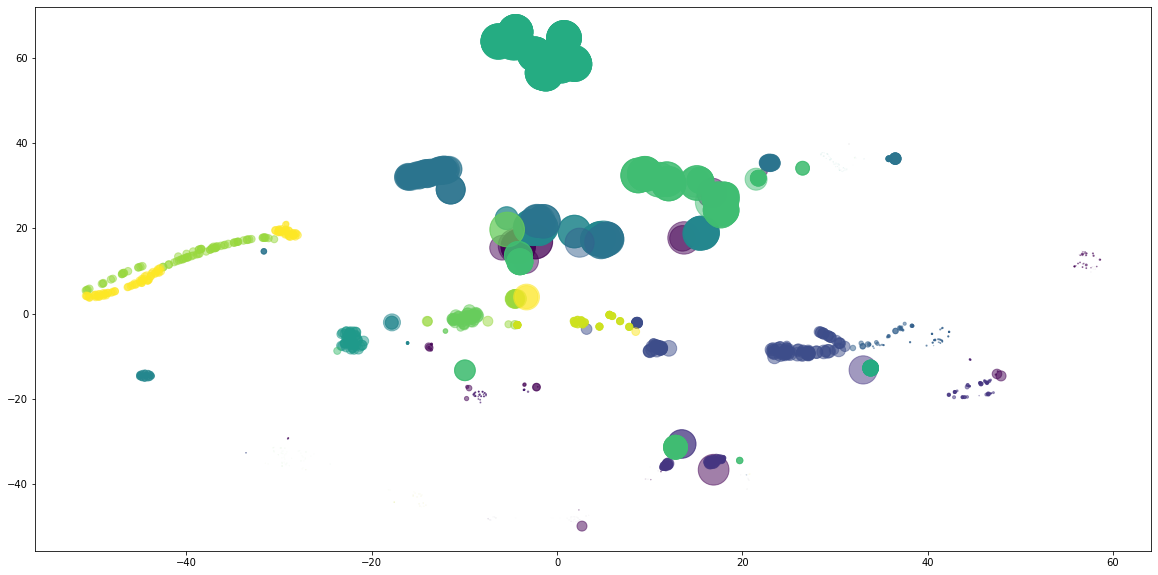

In [15]:
import numpy as np
import matplotlib.pyplot as plt

colour_set = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928', '#444444', '#999999', '#AAAAAA']

N = 50
x = ddd[:,0]
y = ddd[:,1]
colors = data['LabelAsValue']
area = data['_Flow_Duration'] / 100000

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()